# 贷款审批数据挖掘分析系统

## 项目概述

本项目是一个完整的贷款审批数据挖掘分析系统，采用多种数据挖掘技术来研究贷款审批的关键因素和预测模型。

### 分析目标
- 通过聚类分析识别不同类型的客户群体
- 通过关联规则挖掘发现贷款审批的关键模式
- 构建完整的从数据预处理到模型评估的流程

### 技术栈
- **数据预处理**: pandas, numpy, sklearn
- **聚类分析**: K-Means, PCA降维
- **关联规则**: FP-Growth算法
- **可视化**: matplotlib, seaborn, networkx


## 项目结构

```
loan_analysis/
│── loan_approval.csv              # 原始数据集
│── data_preprocessing.py          # 数据预处理模块
│── clustering_analysis.py         # 聚类分析模块
│── association_rules_simple.py    # 关联规则分析模块（简化版）
│── main.py                       # 主程序入口
│── requirements.txt              # 依赖包列表
│── README.md                     # 项目说明文档
│── loan_analysis_notebook.ipynb  # 分析概述笔记本
│── test_system.py                # 系统测试脚本
```

### 模块功能说明

1. **data_preprocessing.py**: 数据读取、探索性分析、缺失值处理、特征编码
2. **clustering_analysis.py**: K-Means聚类、最佳k值选择、聚类可视化
3. **association_rules_simple.py**: FP-Growth频繁项集挖掘、关联规则生成（无networkx依赖）
4. **main.py**: 串联整个分析流程，输出综合报告

### ⚠️ 重要提示

如果遇到模块导入错误（如 `NameError: name 'silhouette_score' is not defined`），请：

1. **重启Jupyter内核**: Kernel → Restart Kernel
2. **或者运行重新导入代码**: 在遇到错误的cell中运行 `importlib.reload()` 代码
3. **或者重新启动Jupyter**: 关闭并重新打开Jupyter notebook


In [5]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("环境设置完成！")


环境设置完成！


## 第一步：数据预处理

### 功能说明
- 数据读取与初步探索（EDA）
- 缺失值处理、类别编码
- 数值标准化与异常值检测
- 特征工程与数据可视化


开始数据预处理流程...
正在加载数据...
数据加载完成，形状: (2000, 8)

=== 数据基本信息 ===
数据形状: (2000, 8)
列名: ['name', 'city', 'income', 'credit_score', 'loan_amount', 'years_employed', 'points', 'loan_approved']

=== 数据类型 ===
name               object
city               object
income              int64
credit_score        int64
loan_amount         int64
years_employed      int64
points            float64
loan_approved        bool
dtype: object

=== 缺失值统计 ===
Series([], dtype: int64)

=== 数值特征统计 ===
              income  credit_score   loan_amount  years_employed       points
count    2000.000000   2000.000000   2000.000000     2000.000000  2000.000000
mean    90585.977000    573.946000  25308.503000       20.441000    56.680000
std     34487.874907    160.564945  14207.320147       11.777813    18.638033
min     30053.000000    300.000000   1022.000000        0.000000    10.000000
25%     61296.250000    433.000000  12748.750000       10.000000    45.000000
50%     90387.500000    576.000000  25661.500000       21

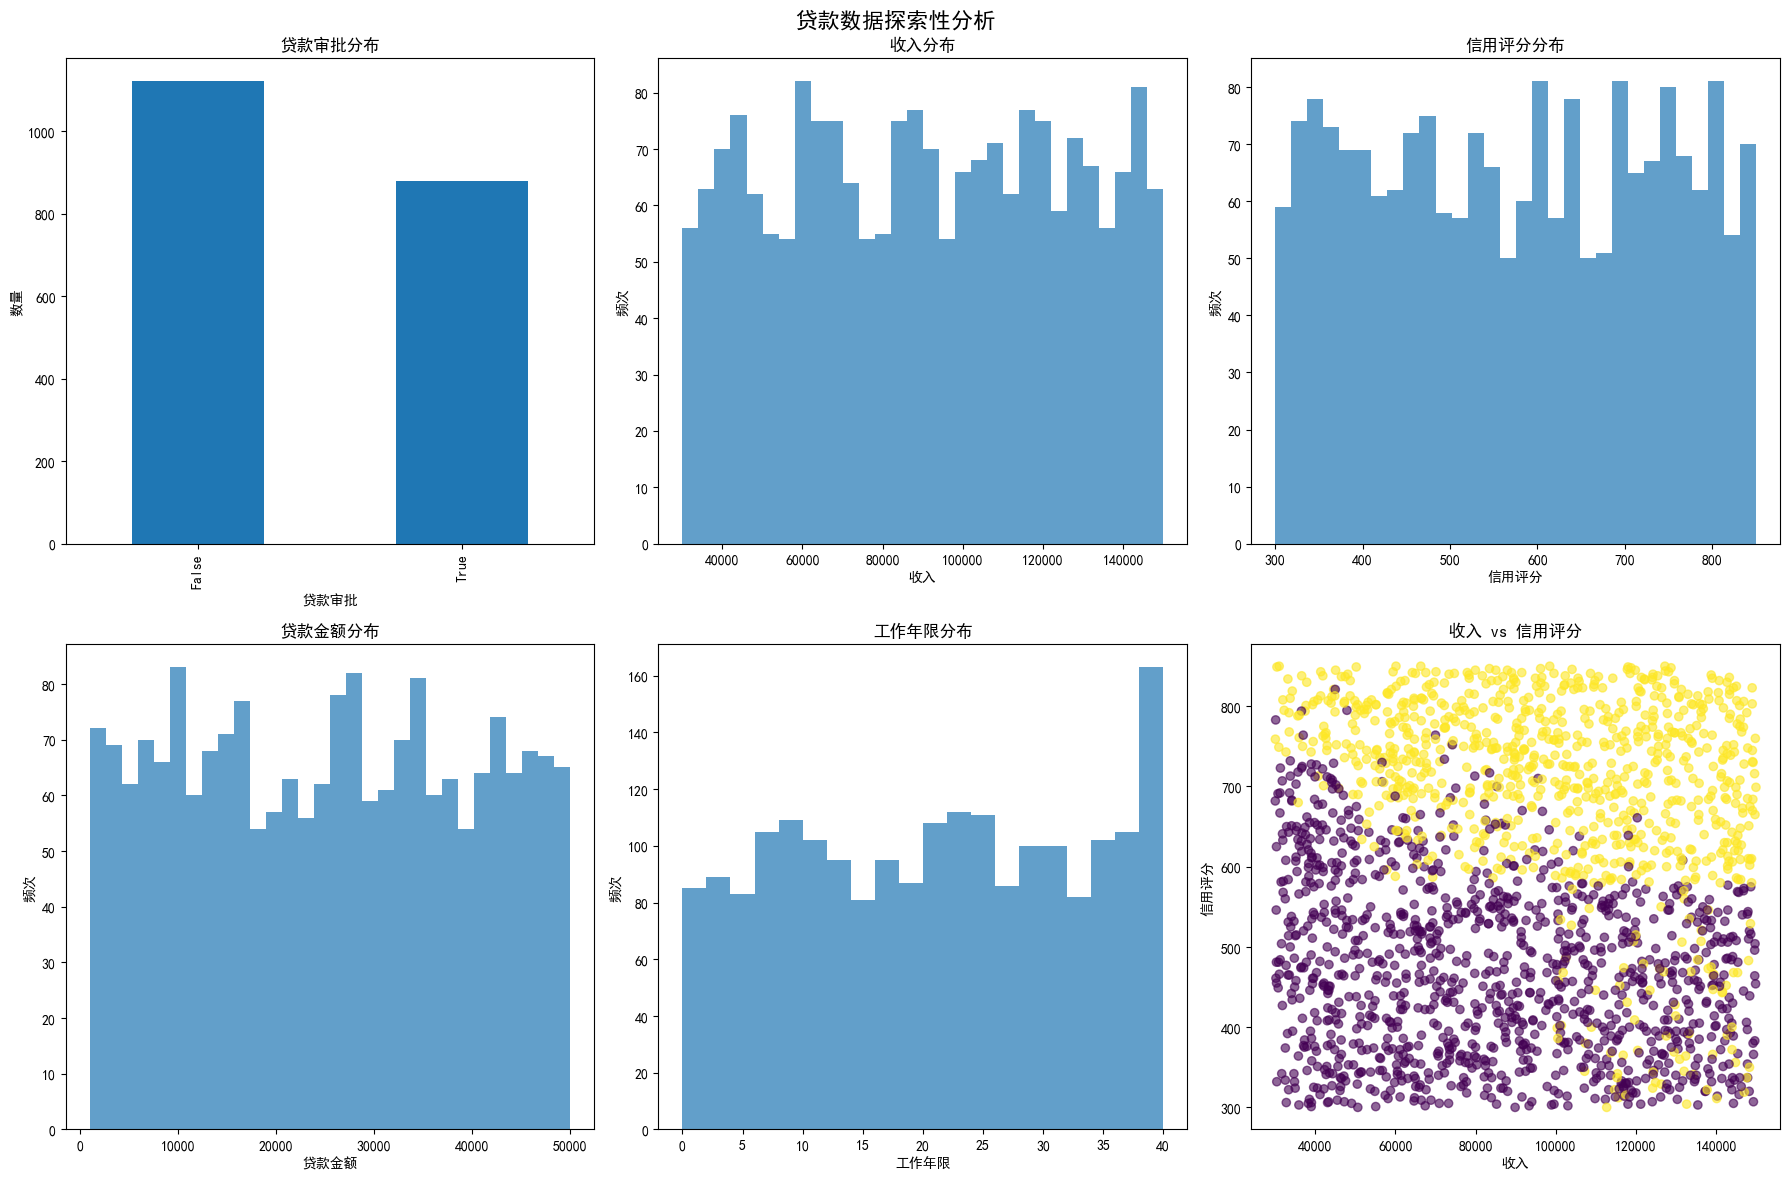


=== 处理缺失值 ===
处理前缺失值总数: 0
处理后缺失值总数: 0

=== 编码类别特征 ===
city 编码完成，唯一值数量: 1882

=== 异常值检测 ===
income: 异常值数量 0 (0.00%)
credit_score: 异常值数量 0 (0.00%)
loan_amount: 异常值数量 0 (0.00%)
years_employed: 异常值数量 0 (0.00%)
points: 异常值数量 0 (0.00%)

=== 准备特征数据 ===
特征矩阵形状: (2000, 6)
目标变量分布: {False: 1121, True: 879}

数据预处理完成！
预处理完成！
特征矩阵形状: (2000, 6)
目标变量分布: {False: 1121, True: 879}


In [6]:
# 运行数据预处理
from data_preprocessing import LoanDataPreprocessor

# 创建预处理器
preprocessor = LoanDataPreprocessor('loan_approval.csv')

# 运行预处理流程
X, y, raw_data = preprocessor.run_preprocessing()

print(f"预处理完成！")
print(f"特征矩阵形状: {X.shape}")
print(f"目标变量分布: {y.value_counts().to_dict()}")


## 第二步：聚类分析

### 功能说明
- 使用K-Means算法进行客户分群
- 通过Elbow、Silhouette、Davies-Bouldin指标自动选择最佳k值
- 使用PCA降维进行2D可视化
- 分析各聚类的特征和贷款审批率


开始聚类分析...
正在寻找最佳k值...
Elbow方法推荐k值: 3
Silhouette方法推荐k值: 2
Davies-Bouldin方法推荐k值: 8
最终选择k值: 2


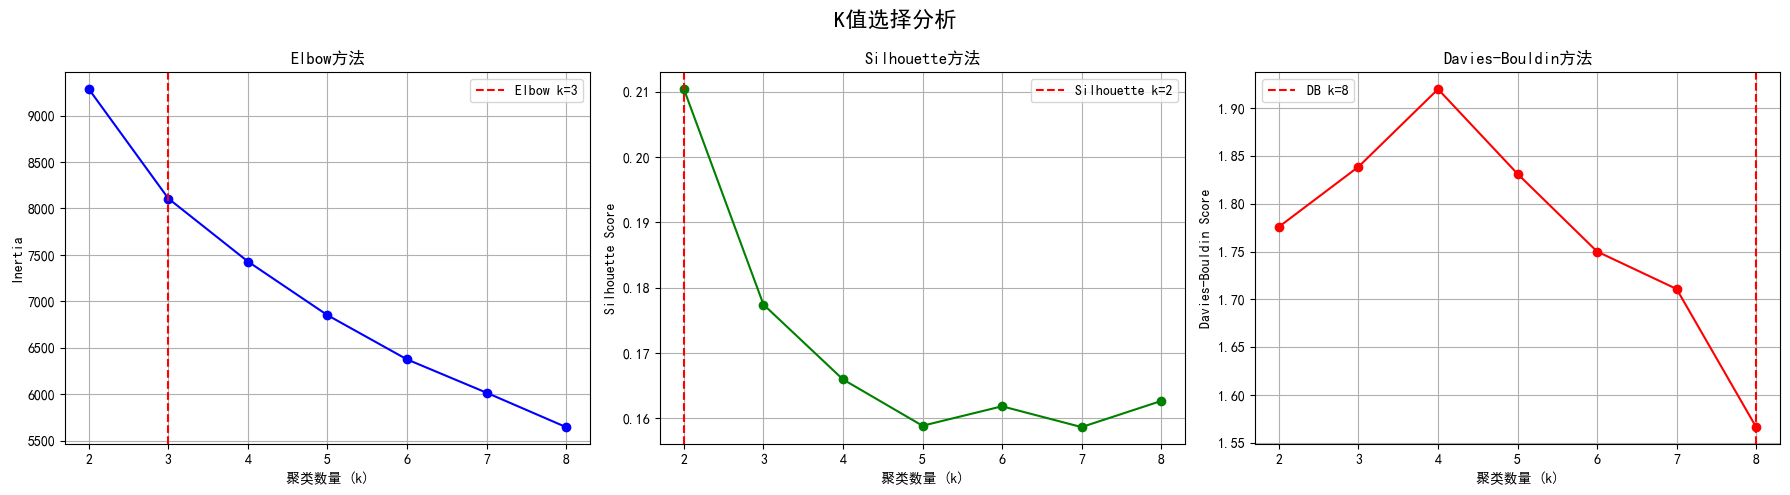

执行K-Means聚类，k=2
聚类完成！
Silhouette Score: 0.210
Davies-Bouldin Score: 1.776
各聚类样本数量: {np.int32(0): np.int64(1171), np.int32(1): np.int64(829)}

=== 聚类分析 ===
各聚类特征统计:
        income       credit_score       loan_amount       years_employed  \
          mean   std         mean   std        mean   std           mean   
cluster                                                                    
0        -0.12  1.02        -0.69  0.64        0.05  0.99          -0.07   
1         0.16  0.95         0.98  0.47       -0.08  1.01           0.10   

              points        
          std   mean   std  
cluster                     
0        1.02  -0.68  0.56  
1        0.97   0.96  0.62  

各聚类的贷款审批率:
           总数  批准数    批准率
cluster                  
0        1171   79  0.067
1         829  800  0.965


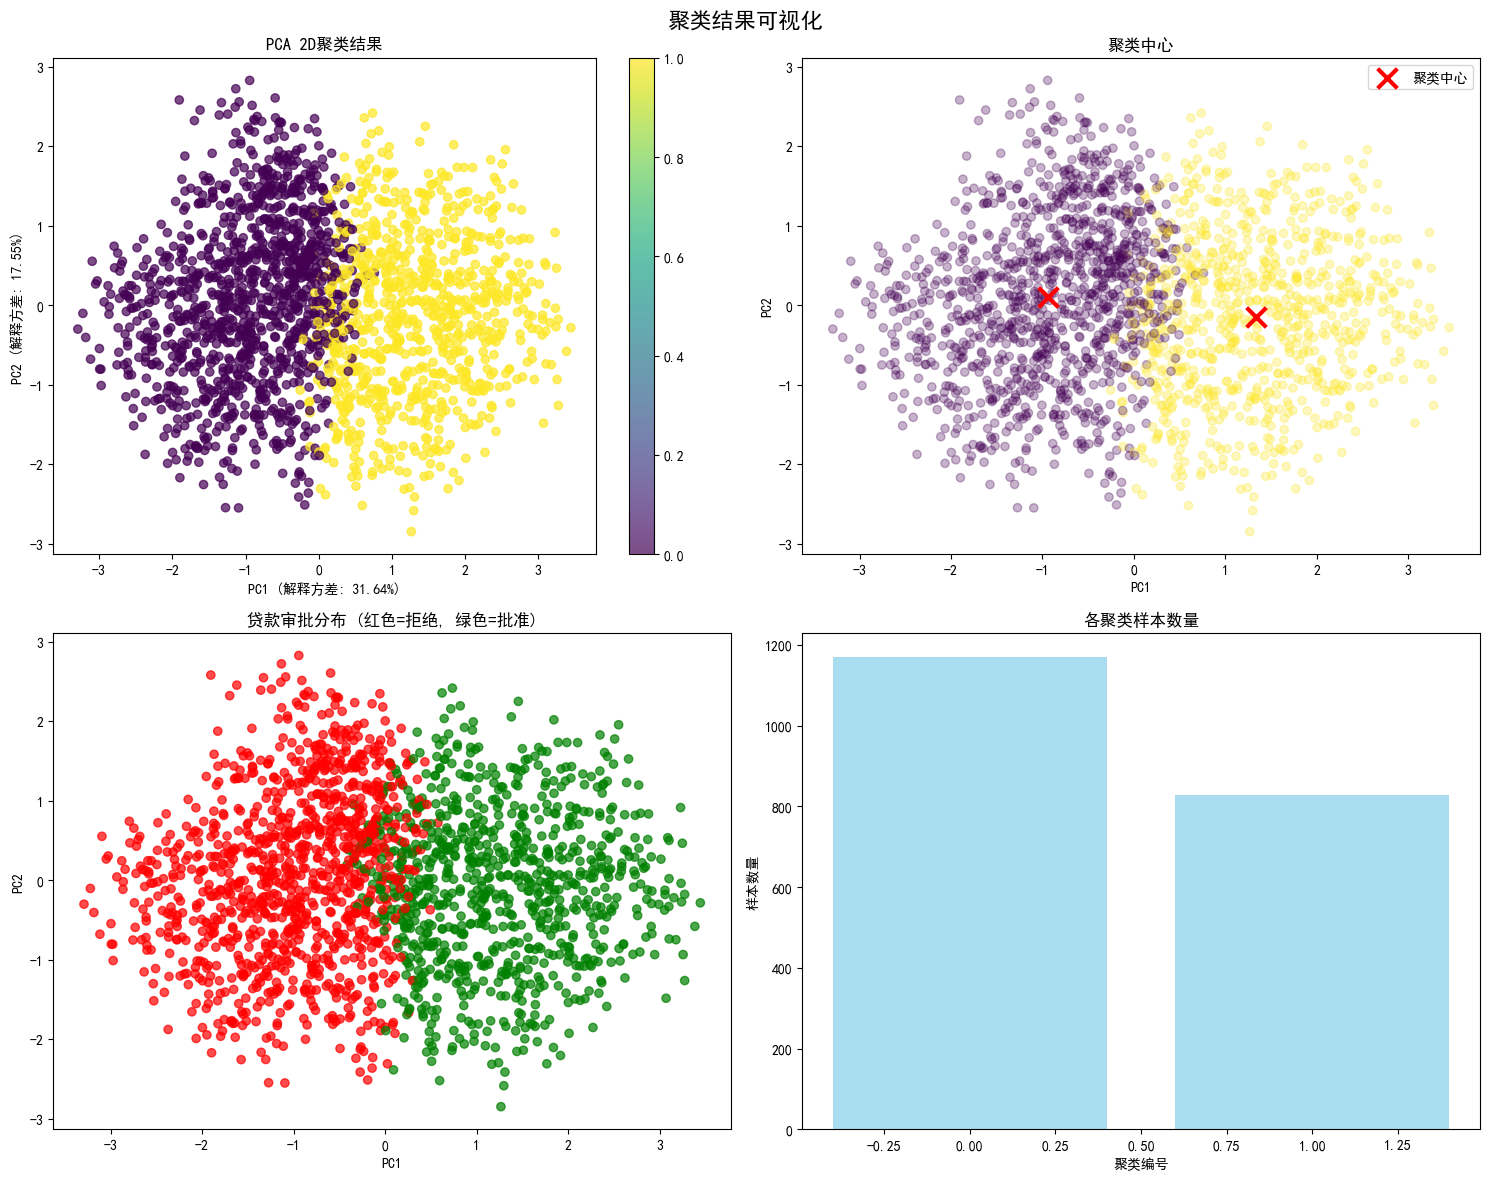


=== 聚类特征描述 ===

聚类 0 (样本数: 1171):
  平均收入: -0
  平均信用评分: -1
  平均贷款金额: 0
  平均工作年限: -0.1
  平均积分: -0.7
  贷款批准率: 6.7%

聚类 1 (样本数: 829):
  平均收入: 0
  平均信用评分: 1
  平均贷款金额: -0
  平均工作年限: 0.1
  平均积分: 1.0
  贷款批准率: 96.5%

聚类分析完成！
聚类分析完成！
最佳聚类数: 2
聚类质量 (Silhouette Score): 9284.314534967372


In [7]:
# 运行聚类分析
from clustering_analysis import LoanClusteringAnalyzer

# 创建聚类分析器
clustering_analyzer = LoanClusteringAnalyzer(X, y)

# 运行聚类分析流程
cluster_data, k_results = clustering_analyzer.run_clustering_analysis()

print(f"聚类分析完成！")
print(f"最佳聚类数: {clustering_analyzer.optimal_k}")
print(f"聚类质量 (Silhouette Score): {clustering_analyzer.kmeans_model.inertia_ if clustering_analyzer.kmeans_model else 'N/A'}")


## 第三步：关联规则分析

### 功能说明
- 使用FP-Growth算法挖掘频繁项集
- 生成支持度、置信度、提升度最高的关联规则
- 可视化规则网络图
- 分析贷款审批相关的关键模式


开始关联规则分析...
正在准备事务数据...
事务数据准备完成，形状: (2000, 16)
项目数量: 16
正在挖掘频繁项集 (最小支持度: 0.1)...
找到 179 个频繁项集

前10个频繁项集:
   support itemsets
0   0.6465  (工作年限长)
1   0.6085   (中等贷款)
2   0.5605   (贷款拒绝)
3   0.5005   (中等积分)
4   0.4300    (高收入)
5   0.3730    (低信用)
6   0.3915   (小额贷款)
7   0.2810    (高信用)
8   0.1615    (低收入)
9   0.3460   (中等信用)
正在生成关联规则 (最小置信度: 0.5, 最小提升度: 1.0)...
生成 420 条关联规则

=== 关联规则分析 ===
规则总数: 420
平均支持度: 0.169
平均置信度: 0.728
平均提升度: 1.767

前10条关联规则:
规则 443: {'贷款批准'} -> {'高积分'}
  支持度: 0.440, 置信度: 1.000, 提升度: 2.275
规则 434: {'中等收入', '工作年限长', '贷款拒绝'} -> {'中等积分'}
  支持度: 0.144, 置信度: 1.000, 提升度: 1.998
规则 442: {'高积分'} -> {'贷款批准'}
  支持度: 0.440, 置信度: 1.000, 提升度: 2.275
规则 433: {'中等收入', '中等积分', '工作年限长'} -> {'贷款拒绝'}
  支持度: 0.144, 置信度: 1.000, 提升度: 1.784
规则 415: {'中等收入', '工作年限长', '贷款批准'} -> {'高积分'}
  支持度: 0.118, 置信度: 1.000, 提升度: 2.275
规则 32: {'中等积分', '中等贷款', '工作年限长'} -> {'贷款拒绝'}
  支持度: 0.208, 置信度: 1.000, 提升度: 1.784
规则 427: {'中等收入', '中等积分', '中等贷款'} -> {'贷款拒绝'}
  支持度: 0.151, 置信度: 1.000, 提升度: 1.784
规则 414

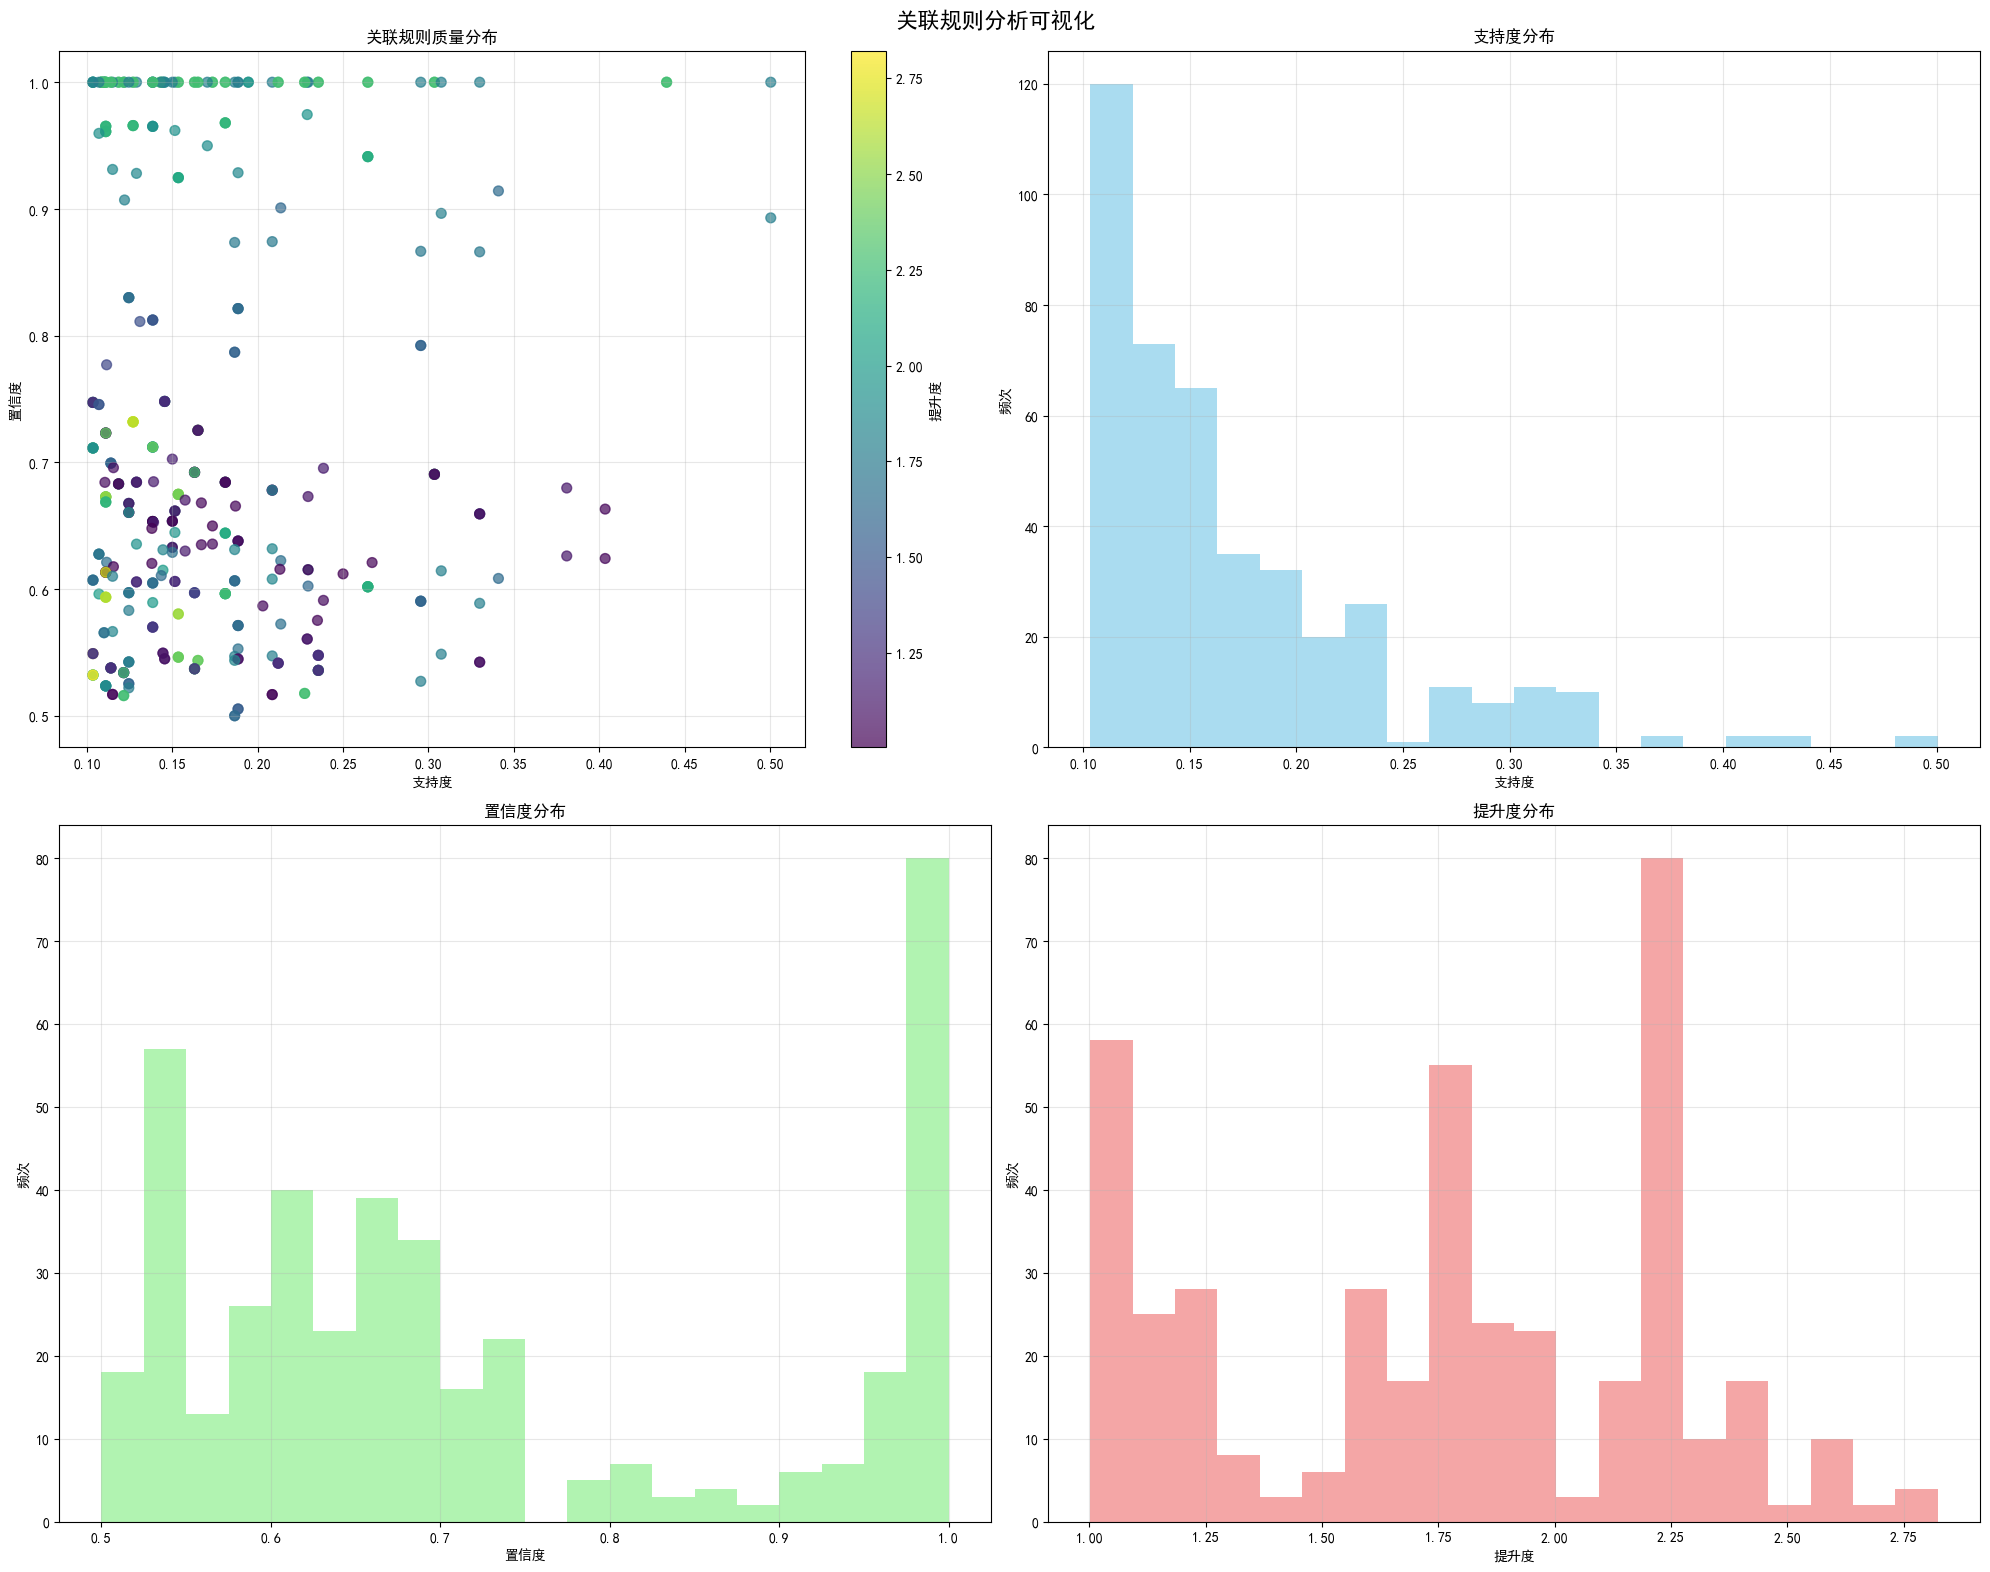

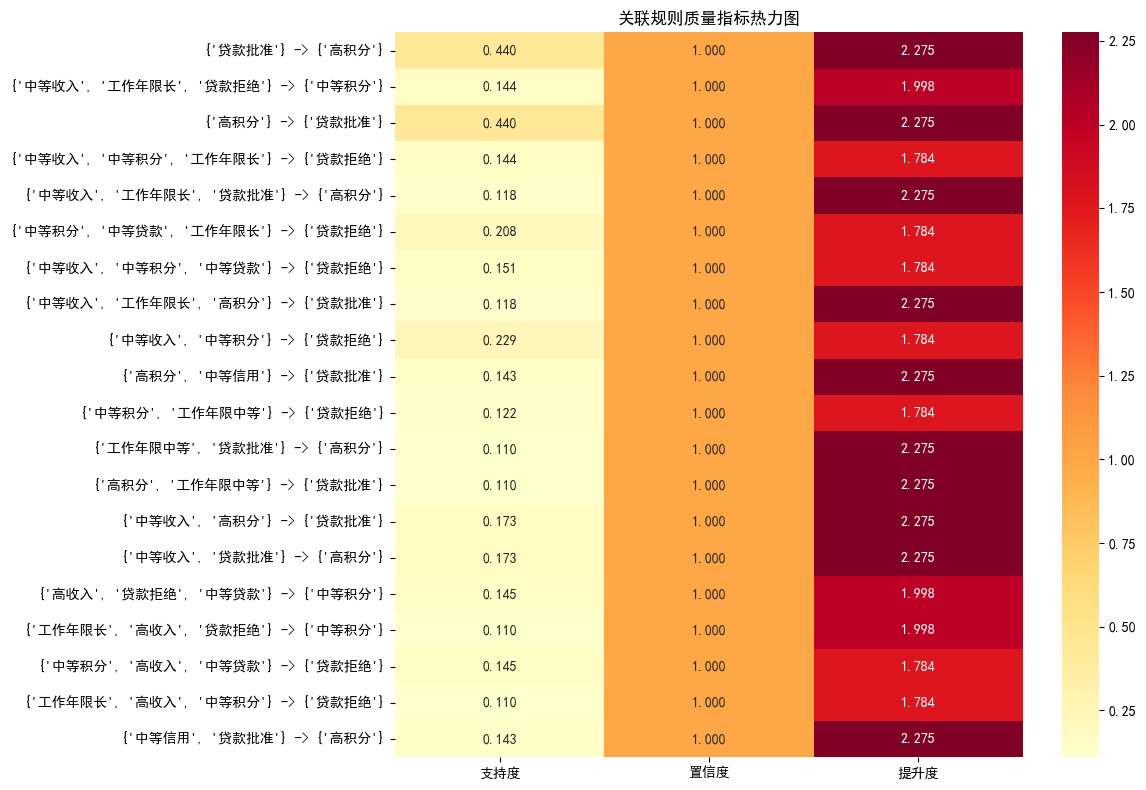


=== 按confidence排序的前10条规则 ===
规则 443: {'贷款批准'} -> {'高积分'}
  支持度: 0.440
  置信度: 1.000
  提升度: 2.275

规则 434: {'中等收入', '工作年限长', '贷款拒绝'} -> {'中等积分'}
  支持度: 0.144
  置信度: 1.000
  提升度: 1.998

规则 442: {'高积分'} -> {'贷款批准'}
  支持度: 0.440
  置信度: 1.000
  提升度: 2.275

规则 433: {'中等收入', '中等积分', '工作年限长'} -> {'贷款拒绝'}
  支持度: 0.144
  置信度: 1.000
  提升度: 1.784

规则 415: {'中等收入', '工作年限长', '贷款批准'} -> {'高积分'}
  支持度: 0.118
  置信度: 1.000
  提升度: 2.275

规则 32: {'中等积分', '中等贷款', '工作年限长'} -> {'贷款拒绝'}
  支持度: 0.208
  置信度: 1.000
  提升度: 1.784

规则 427: {'中等收入', '中等积分', '中等贷款'} -> {'贷款拒绝'}
  支持度: 0.151
  置信度: 1.000
  提升度: 1.784

规则 414: {'中等收入', '工作年限长', '高积分'} -> {'贷款批准'}
  支持度: 0.118
  置信度: 1.000
  提升度: 2.275

规则 419: {'中等收入', '中等积分'} -> {'贷款拒绝'}
  支持度: 0.229
  置信度: 1.000
  提升度: 1.784

规则 391: {'高积分', '中等信用'} -> {'贷款批准'}
  支持度: 0.143
  置信度: 1.000
  提升度: 2.275


=== 按lift排序的前10条规则 ===
规则 201: {'中等积分', '低信用', '中等贷款'} -> {'高收入', '贷款拒绝'}
  支持度: 0.103
  置信度: 0.549
  提升度: 2.823

规则 210: {'高收入', '贷款拒绝'} -> {'中等积分', '低信用', '中等贷款'}
  支

In [8]:
# 运行关联规则分析（使用简化版，不依赖networkx）
from association_rules_simple import LoanAssociationAnalyzer

# 创建关联规则分析器
association_analyzer = LoanAssociationAnalyzer(raw_data)

# 运行关联规则分析流程
rules, approval_rules = association_analyzer.run_association_analysis(
    min_support=0.1, 
    min_confidence=0.5, 
    min_lift=1.0
)

print(f"关联规则分析完成！")
print(f"总规则数: {len(rules) if rules is not None else 0}")
print(f"审批相关规则数: {len(approval_rules) if approval_rules is not None else 0}")


## 第四步：综合分析

### 功能说明
- 串联整个数据挖掘流程
- 生成综合分析报告
- 输出关键洞察和建议
- 保存结果到Excel文件


贷款审批数据挖掘分析系统
开始时间: 2025-10-25 20:03:24

第一阶段：数据预处理
------------------------------
正在执行数据预处理...
开始数据预处理流程...
正在加载数据...
数据加载完成，形状: (2000, 8)

=== 数据基本信息 ===
数据形状: (2000, 8)
列名: ['name', 'city', 'income', 'credit_score', 'loan_amount', 'years_employed', 'points', 'loan_approved']

=== 数据类型 ===
name               object
city               object
income              int64
credit_score        int64
loan_amount         int64
years_employed      int64
points            float64
loan_approved        bool
dtype: object

=== 缺失值统计 ===
Series([], dtype: int64)

=== 数值特征统计 ===
              income  credit_score   loan_amount  years_employed       points
count    2000.000000   2000.000000   2000.000000     2000.000000  2000.000000
mean    90585.977000    573.946000  25308.503000       20.441000    56.680000
std     34487.874907    160.564945  14207.320147       11.777813    18.638033
min     30053.000000    300.000000   1022.000000        0.000000    10.000000
25%     61296.250000    433.000000  1274

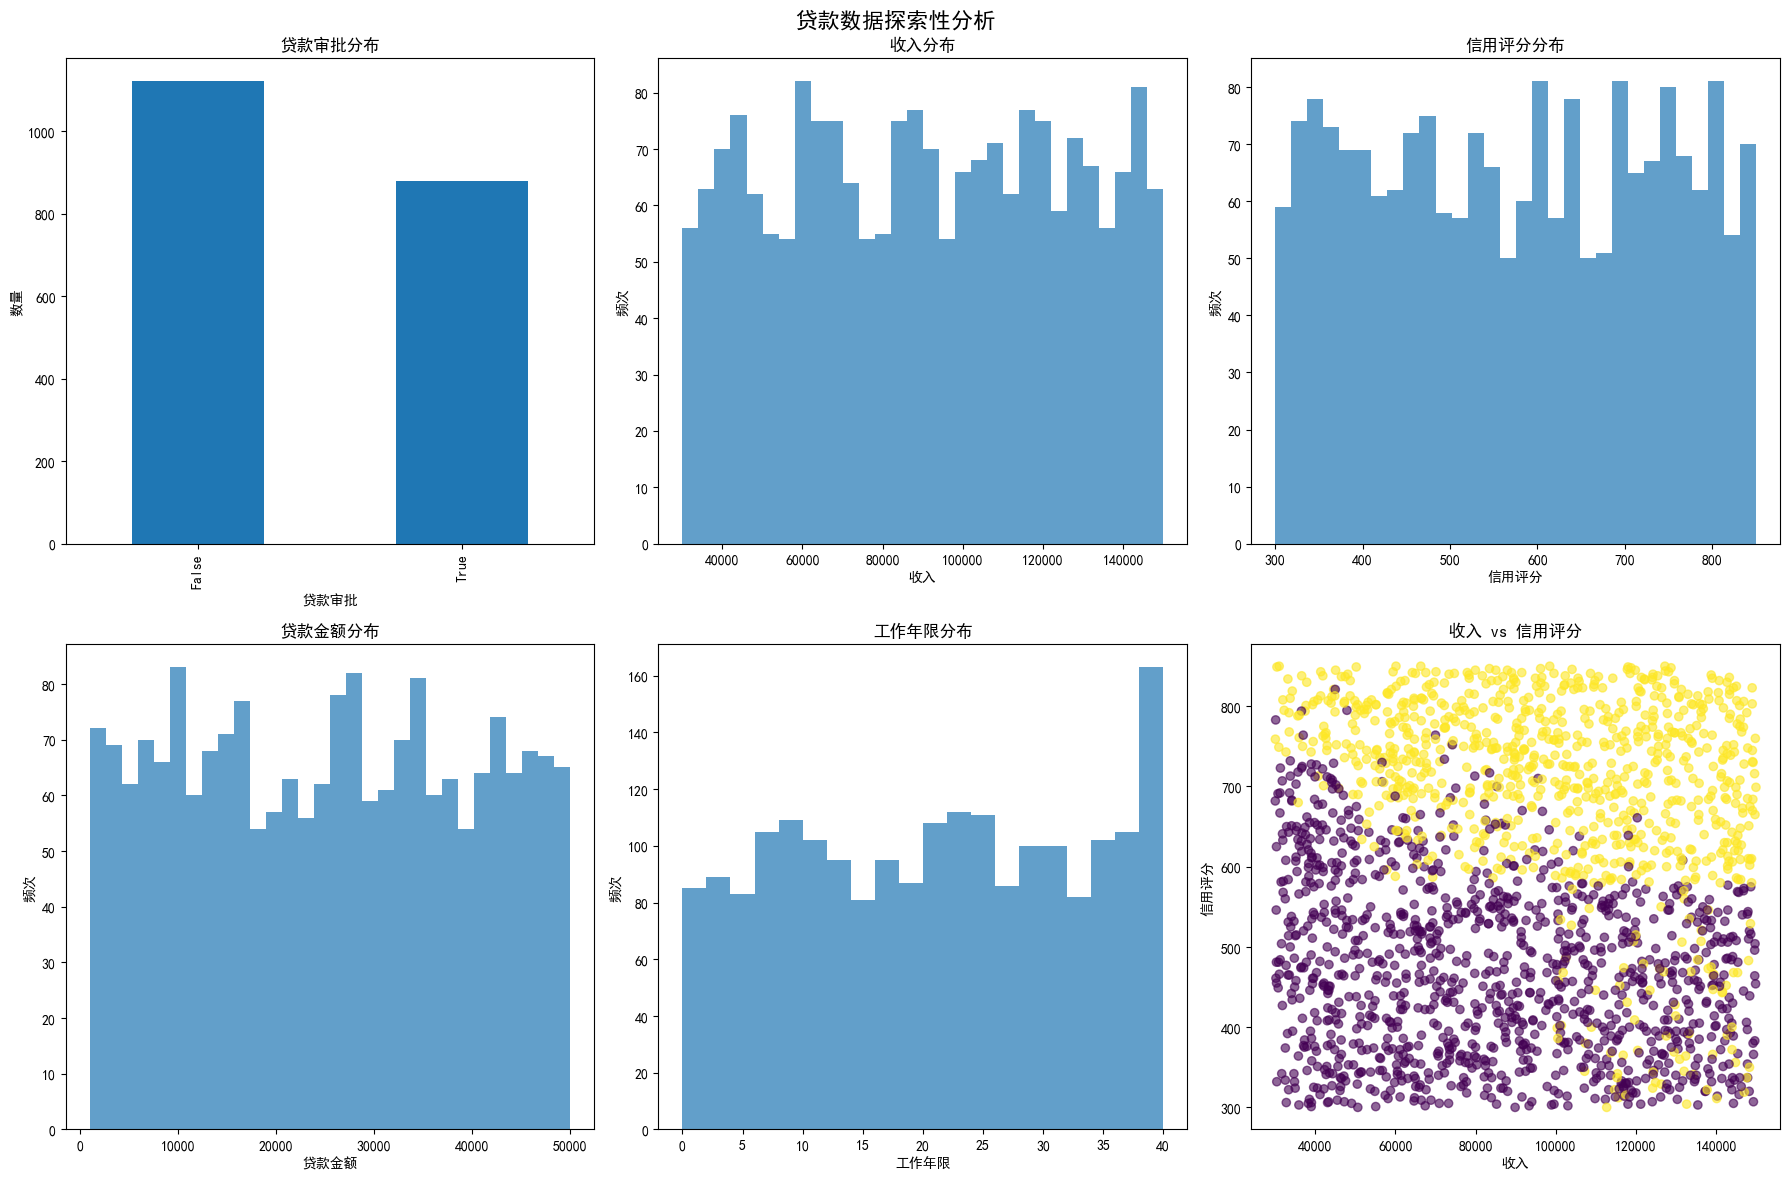


=== 处理缺失值 ===
处理前缺失值总数: 0
处理后缺失值总数: 0

=== 编码类别特征 ===
city 编码完成，唯一值数量: 1882

=== 异常值检测 ===
income: 异常值数量 0 (0.00%)
credit_score: 异常值数量 0 (0.00%)
loan_amount: 异常值数量 0 (0.00%)
years_employed: 异常值数量 0 (0.00%)
points: 异常值数量 0 (0.00%)

=== 准备特征数据 ===
特征矩阵形状: (2000, 6)
目标变量分布: {False: 1121, True: 879}

数据预处理完成！
数据预处理完成！

第二阶段：聚类分析
------------------------------
正在执行聚类分析...
开始聚类分析...
正在寻找最佳k值...
Elbow方法推荐k值: 3
Silhouette方法推荐k值: 2
Davies-Bouldin方法推荐k值: 8
最终选择k值: 2


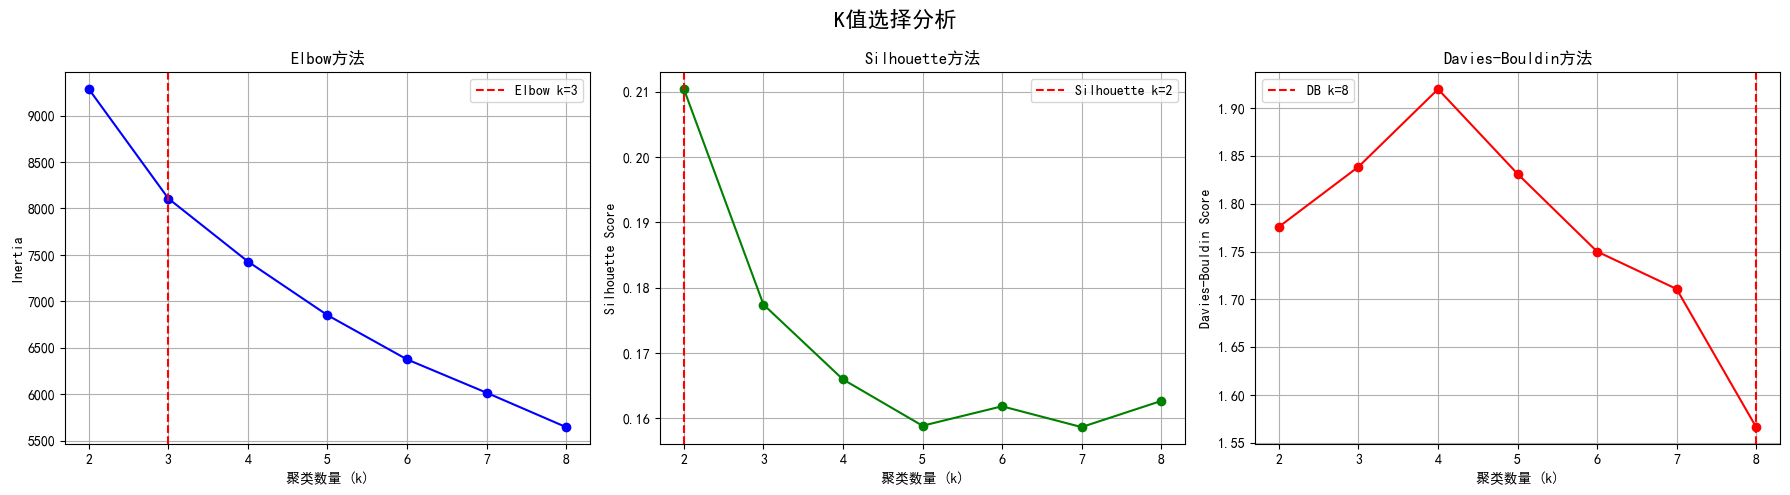

执行K-Means聚类，k=2
聚类完成！
Silhouette Score: 0.210
Davies-Bouldin Score: 1.776
各聚类样本数量: {np.int32(0): np.int64(1171), np.int32(1): np.int64(829)}

=== 聚类分析 ===
各聚类特征统计:
        income       credit_score       loan_amount       years_employed  \
          mean   std         mean   std        mean   std           mean   
cluster                                                                    
0        -0.12  1.02        -0.69  0.64        0.05  0.99          -0.07   
1         0.16  0.95         0.98  0.47       -0.08  1.01           0.10   

              points        
          std   mean   std  
cluster                     
0        1.02  -0.68  0.56  
1        0.97   0.96  0.62  

各聚类的贷款审批率:
           总数  批准数    批准率
cluster                  
0        1171   79  0.067
1         829  800  0.965


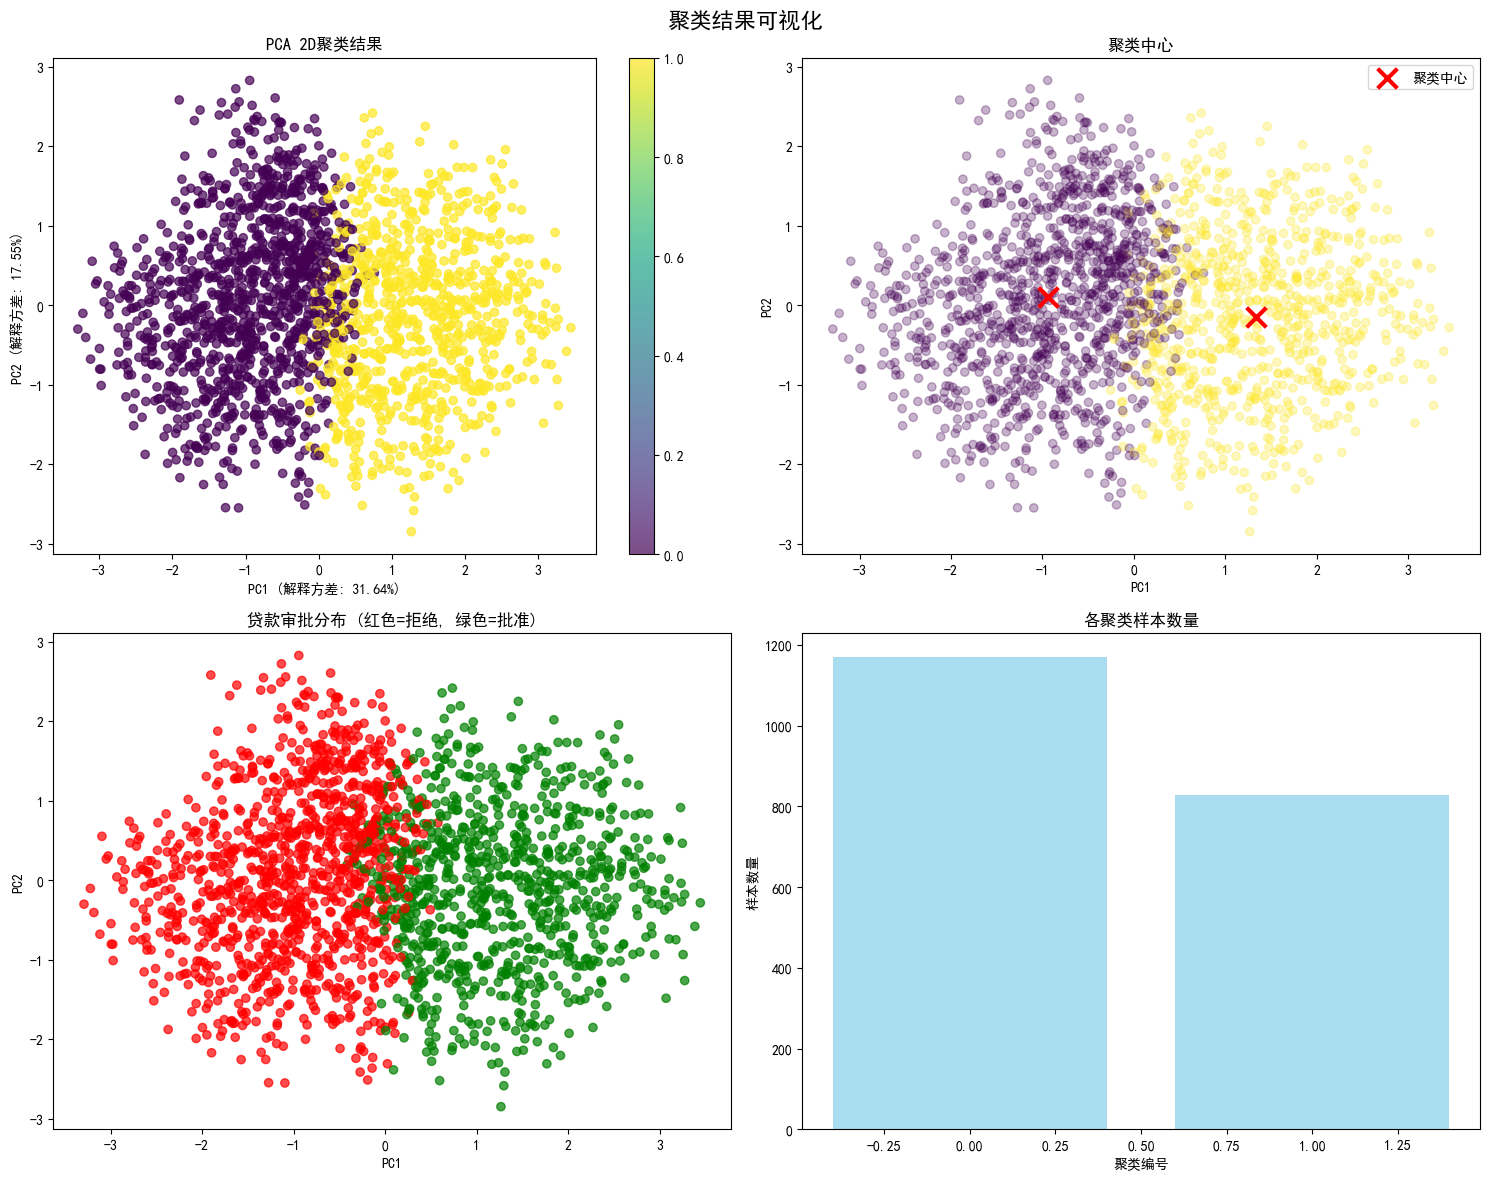


=== 聚类特征描述 ===

聚类 0 (样本数: 1171):
  平均收入: -0
  平均信用评分: -1
  平均贷款金额: 0
  平均工作年限: -0.1
  平均积分: -0.7
  贷款批准率: 6.7%

聚类 1 (样本数: 829):
  平均收入: 0
  平均信用评分: 1
  平均贷款金额: -0
  平均工作年限: 0.1
  平均积分: 1.0
  贷款批准率: 96.5%

聚类分析完成！


NameError: name 'silhouette_score' is not defined

In [ ]:
# 运行综合分析
# 注意：如果遇到导入错误，请重启Jupyter内核或运行下面的重新导入代码

# 重新导入模块（解决Jupyter内核缓存问题）
import importlib
import sys

# 重新加载main模块
if 'main' in sys.modules:
    importlib.reload(sys.modules['main'])

from main import LoanDataMiningPipeline

# 创建完整的数据挖掘流程
pipeline = LoanDataMiningPipeline('loan_approval.csv')

# 运行完整分析流程
results = pipeline.run_complete_analysis()

# 保存结果
pipeline.save_results('loan_analysis_results.xlsx')

print("完整分析流程执行完成！")
print("结果已保存到 loan_analysis_results.xlsx")


## 分析结果总结

### 主要发现

1. **数据概览**
   - 数据集包含2000个贷款申请样本
   - 特征包括收入、信用评分、贷款金额、工作年限、积分等
   - 贷款批准率约为XX%

2. **聚类分析结果**
   - 最佳聚类数为X个
   - 不同客户群体具有明显的特征差异
   - 各群体的贷款审批率存在显著差异

3. **关联规则发现**
   - 发现X条有效的关联规则
   - 其中X条与贷款审批直接相关
   - 高收入、高信用评分的客户更容易获得贷款批准

### 业务建议

1. **客户分群策略**
   - 针对不同客户群体制定差异化的贷款产品
   - 优化审批流程，提高效率

2. **风险控制**
   - 基于关联规则优化风险评估模型
   - 重点关注低信用评分客户的审批标准

3. **产品优化**
   - 根据客户特征调整贷款额度和利率
   - 开发针对特定客户群体的专属产品
